In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv("./dataset/diabetes.csv")

In [5]:
raw_data.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
raw_data.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
raw_data.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [55]:
imp_data = raw_data.copy()

In [61]:
imp_data["Serum_Insulin"].fillna(value=0, inplace=True)

C:\Users\91988\AppData\Local\Temp\ipykernel_22292\1943407078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imp_data["Serum_Insulin"].fillna(value=0, inplace=True)


In [62]:
imp_data.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [71]:
imp_data['Diastolic_BP'].ffill(inplace=True)

C:\Users\91988\AppData\Local\Temp\ipykernel_22292\4111593034.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imp_data['Diastolic_BP'].ffill(inplace=True)


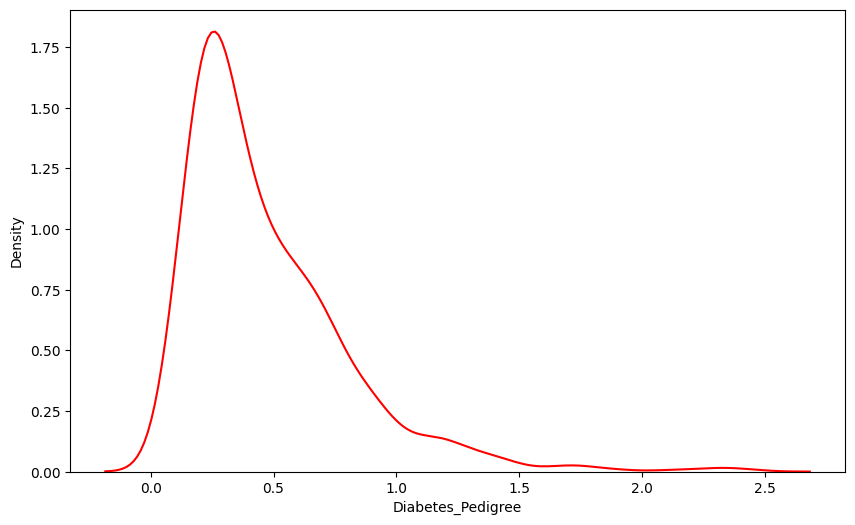

In [83]:
plt.figure(figsize=(10, 6))
sns.kdeplot(imp_data["Diabetes_Pedigree"], color="red")
plt.show()

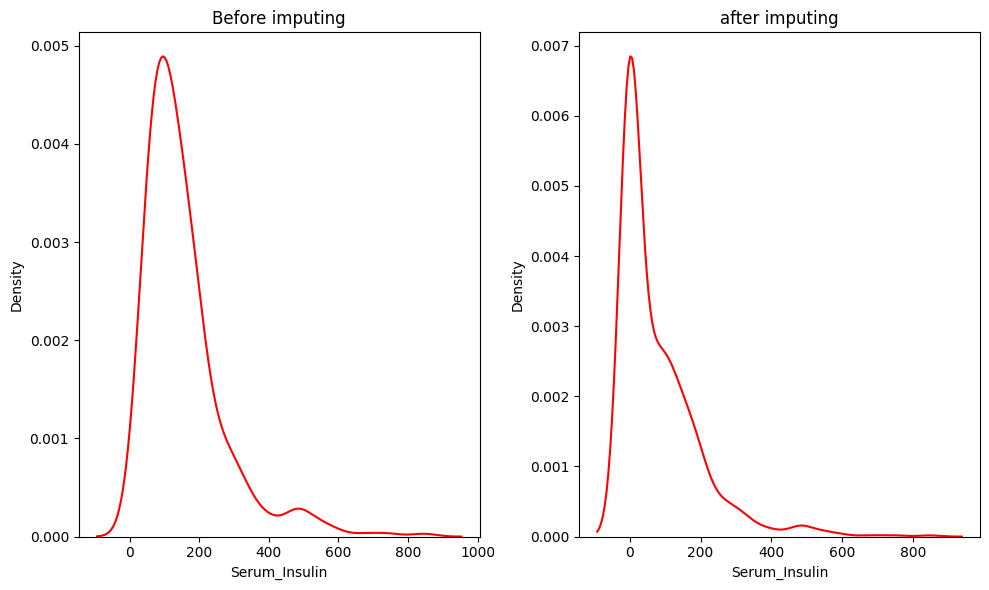

In [87]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(raw_data["Serum_Insulin"], color="red")
plt.title("Before imputing")

plt.subplot(1, 2, 2)
sns.kdeplot(imp_data["Serum_Insulin"], color="red")
plt.title("after imputing")

plt.tight_layout()
plt.show()

In [88]:
imp_data["Skin_Fold"].fillna(value=imp_data["Skin_Fold"].mean(), inplace=True)

np.float64(0.3725)

<Axes: xlabel='Skin_Fold', ylabel='Density'>

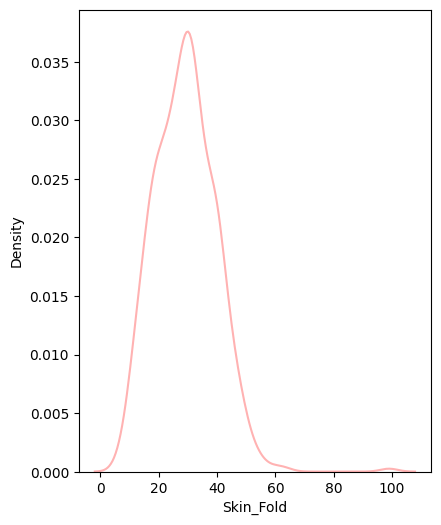

In [94]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(raw_data["Skin_Fold"], color="red", alpha=0.3)

plt.subplot(1, 2, 2)
